## <center><h1>  Data Analysis of Stackoverflow’s Annual Developer Survey - Colombia (2019-2020).</h1></center>

> ## Daniel Jaramillo


## On the present project i apply each stage of the CRISP-DM process. These stages are:


* 1. Business Understanding
* 2. Data Understanding
* 3. Prepare of the data
* 4. Data Modeling
* 5. Evaluate the Results



### <font color="#004D7F"> 1. Business Understanding  </font>


In this notebook, the information from surveys carried out for Colombia by stack overflow for the years 2019 and 2020 is used, which is a question and answer site for programmers, and whose annual survey will be used as a guide to see what the trends are. currently in programming in the country.

Based on the surveys previously described, the following 3 questions are intended to be answered:

1. Which programming languages ​​are the most used to work according to Stackoverflow survey data from 2019 and 2020?
2. What is the relationship between the programming languages ​​used at work with which people want to learn in Colombia according to Stackoverflow survey data from 2019 and 2020?
3. What programming languages ​​are the most searched in Colombia according to Stackoverflow survey data from 2019 and 2020?

### <font color="#004D7F"> 2. Data understanding  </font>

In order to analyze the survey data, descriptive statistics of the main variables will be analyzed, as well as some graphs.

In [1]:
# import python libraries
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)



In [131]:
# Load information
# link: https://insights.stackoverflow.com/survey
s_2019 = pd.read_csv('survey_results_public_2019.csv')
s_2020 = pd.read_csv('survey_results_public_2020.csv')

In [132]:
s_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [133]:
s_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [134]:
s_2019.shape

(88883, 85)

In [135]:
s_2020.shape

(64461, 61)

In [136]:
#precentage missing values in 2019 
na_ratio = ((s_2019.isnull().sum() / len(s_2019))*100).sort_values(ascending = False)
print(na_ratio)

BlockchainOrg         45.799534
CodeRevHrs            43.982539
ConvertedComp         37.194964
CompTotal             37.057705
MiscTechWorkedWith    32.961309
                        ...    
MainBranch             0.621041
Country                0.148510
OpenSourcer            0.000000
Hobbyist               0.000000
Respondent             0.000000
Length: 85, dtype: float64


In [137]:
#precentage missing values in 2020
na_ratio = ((s_2020.isnull().sum() / len(s_2020))*100).sort_values(ascending = False)
print(na_ratio)

ConvertedComp             46.082127
CompTotal                 45.973534
NEWPurchaseResearch       42.102977
PurchaseWhat              38.933619
WebframeDesireNextYear    37.909744
                            ...    
Employment                 0.941655
Country                    0.603466
MainBranch                 0.463846
Hobbyist                   0.069810
Respondent                 0.000000
Length: 61, dtype: float64


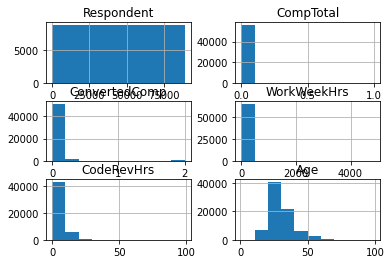

In [138]:
#Histograms of numeric variables in 2019
s_2019.hist();

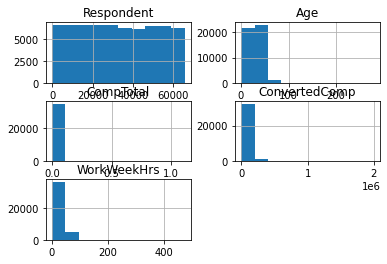

In [139]:
#Histograms of numeric variables in 2020
s_2020.hist();

In [140]:
#describe of numeric variables in 2019 survey
s_2019.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [141]:
#describe of numeric variables in 2020 survey
s_2020.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


### <font color="#004D7F"> 3. Prepare of the data </font>


In [142]:
fill_mode = lambda col: col.fillna(col.mode()[0]) # Mode function

fill_s_2019 = s_2019.apply(fill_mode, axis=0) #Fill all missing values with the mean of the column.
fill_s_2020 = s_2020.apply(fill_mode, axis=0) #Fill all missing values with the mean of the column.

In [143]:
#precentage missing values: 2019 Developer Survey
print(((fill_s_2019.isnull().sum() / len(fill_s_2019))*100).sort_values(ascending = False))

Respondent        0.0
OpSys             0.0
Extraversion      0.0
SocialMedia       0.0
OffOn             0.0
                 ... 
CurrencySymbol    0.0
ResumeUpdate      0.0
JobFactors        0.0
FizzBuzz          0.0
SurveyEase        0.0
Length: 85, dtype: float64


In [15]:
#precentage missing values: 2020 Developer Survey
print(((fill_s_2020.isnull().sum() / len(fill_s_2020))*100).sort_values(ascending = False))

Respondent                      0.0
NEWJobHuntResearch              0.0
NEWOffTopic                     0.0
NEWOnboardGood                  0.0
NEWOtherComms                   0.0
                               ... 
NEWCollabToolsDesireNextYear    0.0
NEWCollabToolsWorkedWith        0.0
NEWDevOps                       0.0
NEWDevOpsImpt                   0.0
YearsCodePro                    0.0
Length: 61, dtype: float64




### What Programming Languages are most used to work and Which Programming Languages are most Required in  Stackoverflow survey data of 2019 and 2020 ?

In [172]:
# Filtering the dataframe 
c_2019 = fill_s_2019[fill_s_2019['Country'] == 'Colombia']
c_2020 = fill_s_2020[fill_s_2020['Country'] == 'Colombia']

In [173]:
c_2019=c_2019[['LanguageWorkedWith', 'LanguageDesireNextYear']].dropna()
c_2020=c_2020[['LanguageWorkedWith', 'LanguageDesireNextYear']].dropna()

In [174]:
c_2019.shape

(313, 2)

In [175]:
c_2020.shape

(285, 2)

In [177]:
c_2019.head()

,LanguageWorkedWith,LanguageDesireNextYear
26,C++;JavaScript;Python;Ruby;SQL;TypeScript,Clojure;Dart;Elixir;JavaScript;Python;Ruby;SQL...
1051,Dart;JavaScript;Kotlin;Swift,Dart;JavaScript;Kotlin;Swift
1105,HTML/CSS;JavaScript;PHP;SQL,HTML/CSS;JavaScript;PHP;SQL
1154,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Python,Erlang;HTML/CSS;JavaScript;Python;R
1201,Bash/Shell/PowerShell;C;C#;HTML/CSS;Java;JavaS...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;S...


In [178]:
#Split columns
worked_languages_2019=c_2019['LanguageWorkedWith'].apply(lambda x: x.split(';'))
wanted_languages_2019=c_2019['LanguageDesireNextYear'].apply(lambda x: x.split(';'))
worked_languages_2020=c_2020['LanguageWorkedWith'].apply(lambda x: x.split(';'))
wanted_languages_2020=c_2020['LanguageDesireNextYear'].apply(lambda x: x.split(';'))

In [179]:
worked_languages_2019

26        [C++, JavaScript, Python, Ruby, SQL, TypeScript]
1051                     [Dart, JavaScript, Kotlin, Swift]
1105                      [HTML/CSS, JavaScript, PHP, SQL]
1154     [Bash/Shell/PowerShell, HTML/CSS, JavaScript, ...
1201     [Bash/Shell/PowerShell, C, C#, HTML/CSS, Java,...
                               ...                        
87642                  [HTML/CSS, JavaScript, Python, SQL]
87644    [Bash/Shell/PowerShell, HTML/CSS, JavaScript, ...
88119                                         [JavaScript]
88144    [Bash/Shell/PowerShell, C#, HTML/CSS, Java, Ja...
88344                   [Bash/Shell/PowerShell, Java, VBA]
Name: LanguageWorkedWith, Length: 313, dtype: object

In [180]:
#Ref: https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-a-list-of-lists
# Flat the list
def flat(array_list):
    object_list = []
    for row in array_list:
        for obj in row:
            object_list.append(obj.strip())
            
    return object_list

# Flatting nested list objects.
list_worked_languages_2019 = flat(worked_languages_2019)
list_wanted_languages_2019 = flat(wanted_languages_2019)
list_worked_languages_2020 = flat(worked_languages_2020)
list_wanted_languages_2020 = flat(wanted_languages_2020)

In [181]:
group_wl_dict_2019=dict(Counter(list_worked_languages_2019))
year_2019='2019'
grouped_dict_wl_2019= [{'Programming Language':key, 'Count': value, 'Year': year_2019} for key, value in group_wl_dict_2019.items()]

group_wal_dict_2019=dict(Counter(list_wanted_languages_2019))
year_2019='2019'
grouped_dict_wal_2019= [{'Programming Language':key, 'Count': value, 'Year': year_2019} for key, value in group_wal_dict_2019.items()]

group_wl_dict_2020=dict(Counter(list_worked_languages_2020))
year_2020='2020'
grouped_dict_wl_2020= [{'Programming Language':key, 'Count': value, 'Year': year_2020} for key, value in group_wl_dict_2020.items()]

group_wal_dict_2020=dict(Counter(list_wanted_languages_2020))
year_2020='2020'
grouped_dict_wal_2020= [{'Programming Language':key, 'Count': value, 'Year': year_2020} for key, value in group_wal_dict_2020.items()]


<a id="section4"></a>
### <font color="#004D7F"> 4. Data Modeling </font>


In [182]:
dt_worked_languages_2019=pd.DataFrame(grouped_dict_wl_2019)
dt_wanted_languages_2019=pd.DataFrame(grouped_dict_wal_2019)
dt_worked_languages_2020=pd.DataFrame(grouped_dict_wl_2020)
dt_wanted_languages_2020=pd.DataFrame(grouped_dict_wal_2020)

In [183]:
total_wl_2019=dt_worked_languages_2019['Count'].sum()
total_wal_2019=dt_wanted_languages_2019['Count'].sum()
total_wl_2020=dt_worked_languages_2020['Count'].sum()
total_wal_2020=dt_wanted_languages_2020['Count'].sum()

In [184]:
dt_worked_languages_2019['Porcentaje']=dt_worked_languages_2019['Count']/total_wl_2019
dt_wanted_languages_2019['Porcentaje']=dt_wanted_languages_2019['Count']/total_wal_2019
dt_worked_languages_2020['Porcentaje']=dt_worked_languages_2020['Count']/total_wl_2020
dt_wanted_languages_2020['Porcentaje']=dt_wanted_languages_2020['Count']/total_wal_2020

In [185]:
worked_languages = dt_worked_languages_2019.append(dt_worked_languages_2020)
wanted_languages = dt_wanted_languages_2019.append(dt_wanted_languages_2020)

In [186]:
# Get the top 10 languages
top_10_work = worked_languages.sort_values(by=['Porcentaje'], ascending=False).head(10)['Programming Language'].unique()
top_10_want = wanted_languages.sort_values(by=['Porcentaje'], ascending=False).head(10)['Programming Language'].unique()

worked_chart = worked_languages[worked_languages['Programming Language'].isin(top_10_work)]
wanted_chart = wanted_languages[wanted_languages['Programming Language'].isin(top_10_want)]

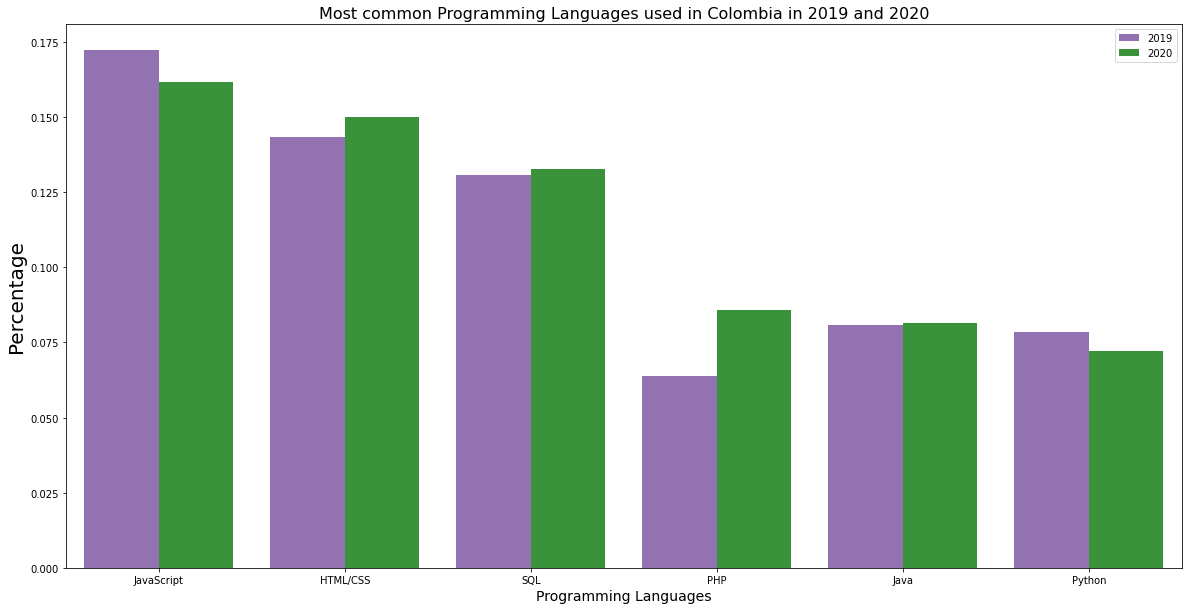

In [187]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'Programming Language', 
            y = 'Porcentaje',
            hue = 'Year', palette=["C4", "C2"],
            data = worked_chart.sort_values(by='Porcentaje', ascending=False))

plt.xlabel("Programming Languages", fontsize = 14)
plt.ylabel("Percentage", fontsize = 20)
plt.legend(title_fontsize='50')
plt.title('Most common Programming Languages used in Colombia in 2019 and 2020', size = 16)
plt.show()

## Results

PHP and HTML grow in importance, while JavaScript and Python lose a bit of participation.Despite the above, the most used programs are still JavaScript, HTML and SQL.


### How does Programming Languages used at work relates with Programming Languages, People Wants to Learn in Colombia According to Stackoverflow survey data of 2019 and 2020?

### Prepare Data

In [208]:
worked_languages_2020=worked_languages[worked_languages['Year']=='2020']
wanted_languages_2020=wanted_languages[wanted_languages['Year']=='2020']
Final=worked_languages_2020.merge(wanted_languages_2020, left_on='Programming Language', right_on='Programming Language')
Final

,Programming Language,Count_x,Year_x,Porcentaje_x,Count_y,Year_y,Porcentaje_y
0,C#,76,2020,0.054795,50,2020,0.041391
1,JavaScript,224,2020,0.161500,133,2020,0.110099
2,SQL,184,2020,0.132660,90,2020,0.074503
3,HTML/CSS,208,2020,0.149964,108,2020,0.089404
4,Java,113,2020,0.081471,65,2020,0.053808
5,PHP,119,2020,0.085797,34,2020,0.028146
6,VBA,20,2020,0.014420,4,2020,0.003311
7,TypeScript,83,2020,0.059841,88,2020,0.072848
8,C++,38,2020,0.027397,34,2020,0.028146
9,Go,15,2020,0.010815,93,2020,0.076987


### Data Modeling

Text(0, 0.5, 'Wanted')

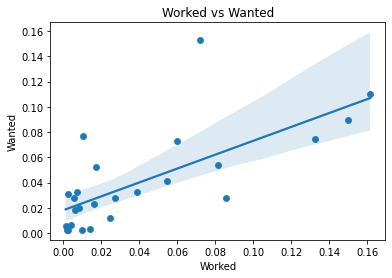

In [212]:
sns.scatterplot(data=Final, x="Porcentaje_x", y="Porcentaje_y")
sns.regplot(data=Final, x='Porcentaje_x', y='Porcentaje_y').set(title='Worked vs Wanted')
plt.xlabel('Worked')
plt.ylabel('Wanted')

### Results

From the graph above, we can draw the following conclusions:
* There is a positive relationship between the languages ​​requested at work, and the languages ​​studied.
* Some languages ​​like python are highly requested, but not used as much at work yet.



### What are the most wanted Programming Languages in Colombia According to Stackoverflow survey data of 2019 and 2020?

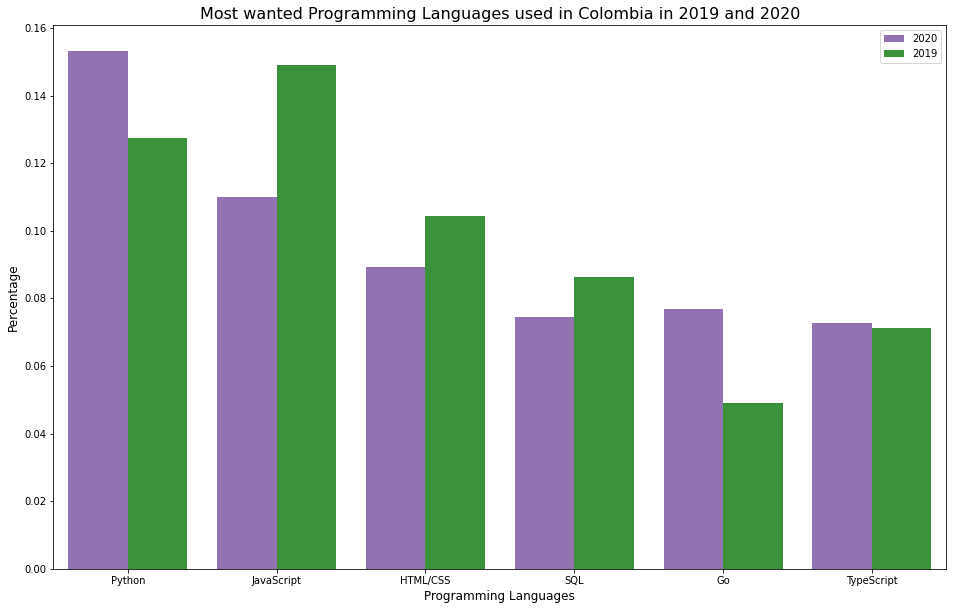

In [198]:
plt.figure(figsize=(16,10))
sns.barplot(x = 'Programming Language', 
            y = 'Porcentaje',palette=["C4", "C2"],
            hue = 'Year',
            data = wanted_chart.sort_values(by='Porcentaje', ascending=False))

plt.title('Most wanted Programming Languages used in Colombia in 2019 and 2020', size = 16)
plt.xlabel("Programming Languages", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.legend(title_fontsize='40')
plt.show()

## Results
The biggest decrease is seen in JavaScript, which is about 4%, followed by Html. On the other hand, the biggest growth is in Go. Python stands out as the most searched program in 2020.

## Conclusion:
In this project, we reviewed which were the most popular programming languages, according to data from the StackOverflow Annual Survey of Developers 2019 and 2020 in Colombia.
According to the above, it was found that some older programming languages, such as JavaScript, HTML/CSS and SQL have a strong presence, but are gradually being replaced by others such as Python.
It is observed that some languages ​​are complementary, so in addition to being the most sought after, they are also the ones that people learn the most.